# Database - Pima Indians Diabetes

Motivation - Help medical professionals to make diagnosis easier by bridging gap between huge datasets and human knowledge.

Apply machine learning techniques for given classification in a dataset that describes a population that is under a high risk of the onset of diabetes.

In [17]:
# Importing Data Analysis Toolkit
import pandas as pd
import numpy as np


# Importing Data Viz toolkit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


%config InlineBackend.figure_format = 'retina'  # Setting the right figure format
import warnings
warnings.filterwarnings('ignore')


In [18]:
pima = pd.read_csv("pima-indians-diabetes.csv")  # file should be in the same directory of Jupyter Notebook

In [19]:
pima.head()  # To just have a look at the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Additional details about the attributes

Pregnancies:     Number of times pregnant

Glucose:         Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure:   Diastolic blood pressure (mm Hg)

SkinThickness:   Triceps skin fold thickness (mm)

Insulin:         2-Hour serum insulin (mu U/ml)

BMI:             Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction:    Diabetes pedigree function

Age:            Age (years)

Outcome:        Class variable (0 or 1)

In [20]:
pima.shape  # To check rows, columns (Data points, Parameters)

(768, 9)

In [21]:
pima.describe()  # Basic Stat description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
pima.groupby("Outcome").size()  # Grouping by the last Parameter to check the number of Positives and Negatives

Outcome
0    500
1    268
dtype: int64

In [23]:
a = 500/768

In [24]:
a

0.6510416666666666

In [25]:
b = 1 - a

In [26]:
b

0.34895833333333337

In [27]:
# So we see that 65.10% are negatives and 34.89% are positives.

In [28]:
#pima['Outcome'].value_counts().plot('bar')  # Just seeing the same stuff on bars

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

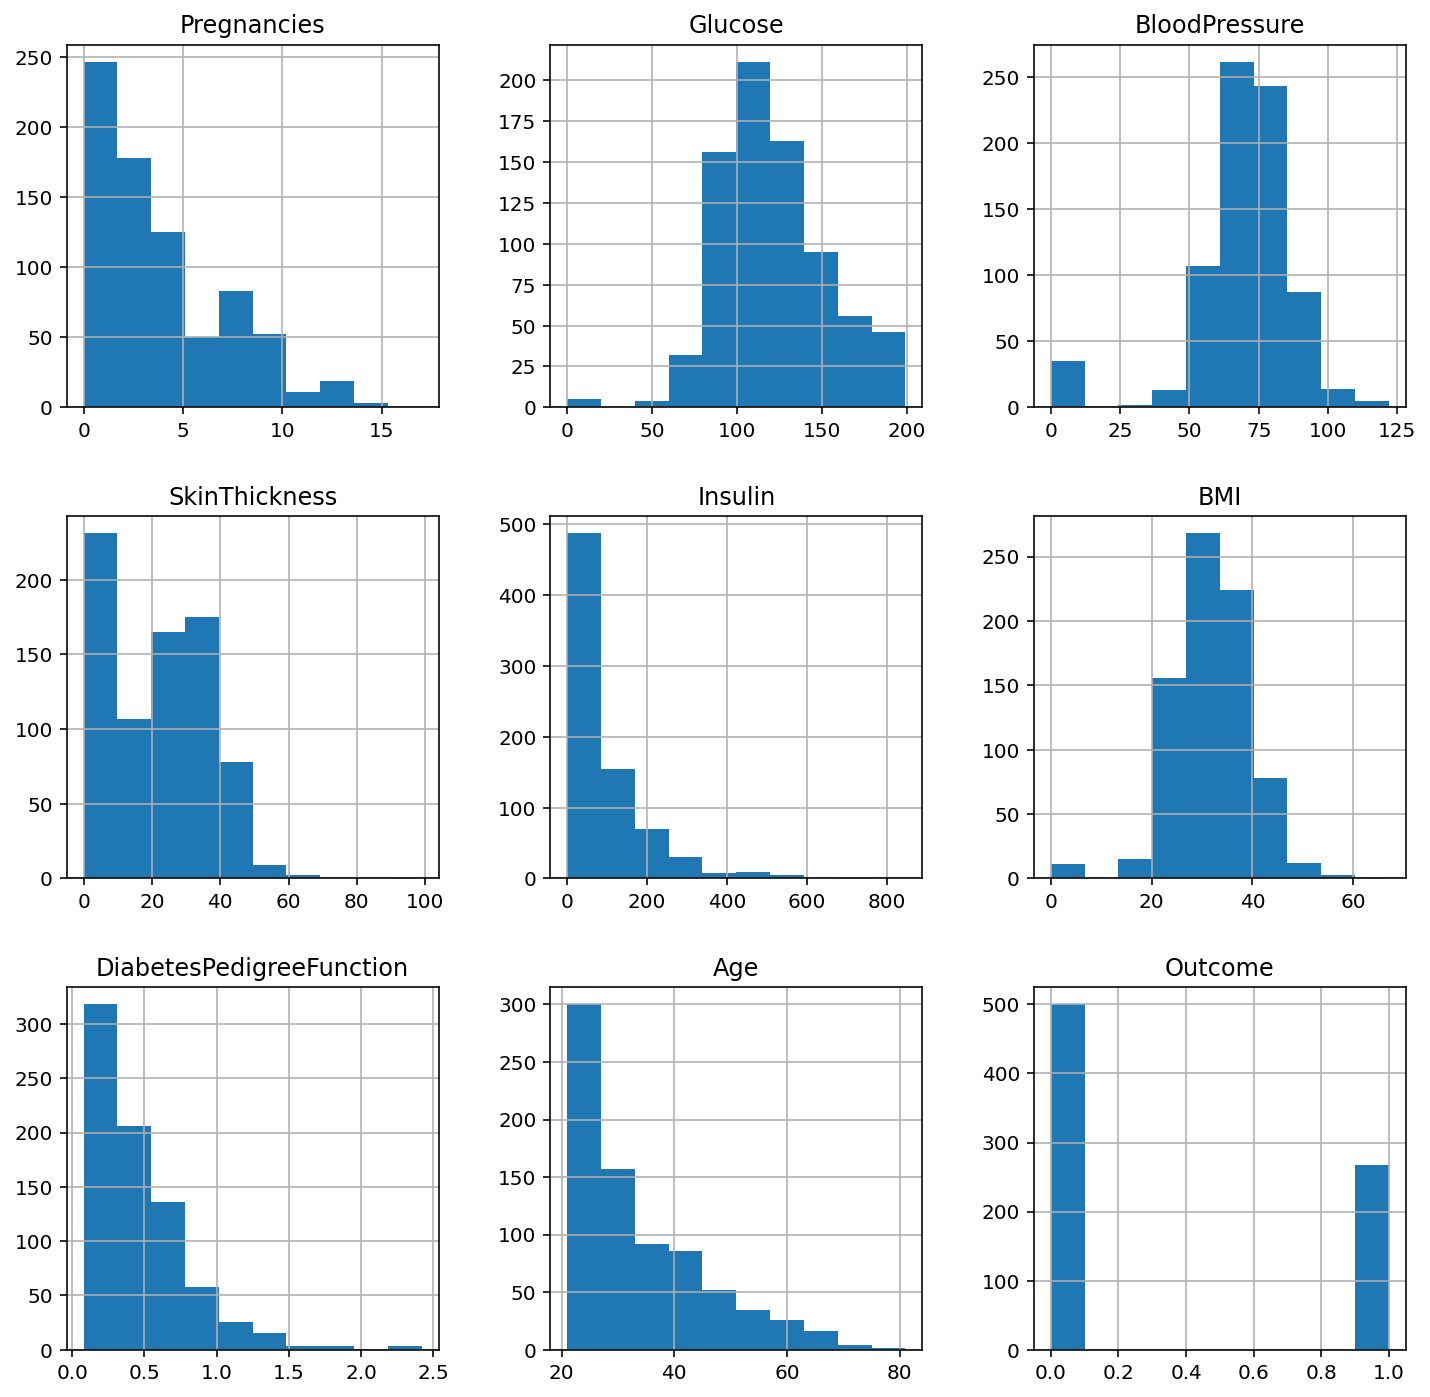

In [29]:
pima.hist(figsize=(12,12))   # Visualizing each parameter

Attributes BMI, BloodPressure, Glucose are found to be normally distributed. 

BMI and BloodPressure nearly have Gaussian distribution. 

Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed.

In [30]:
# X axis is the data range. Y axis is How many data points have that data.

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

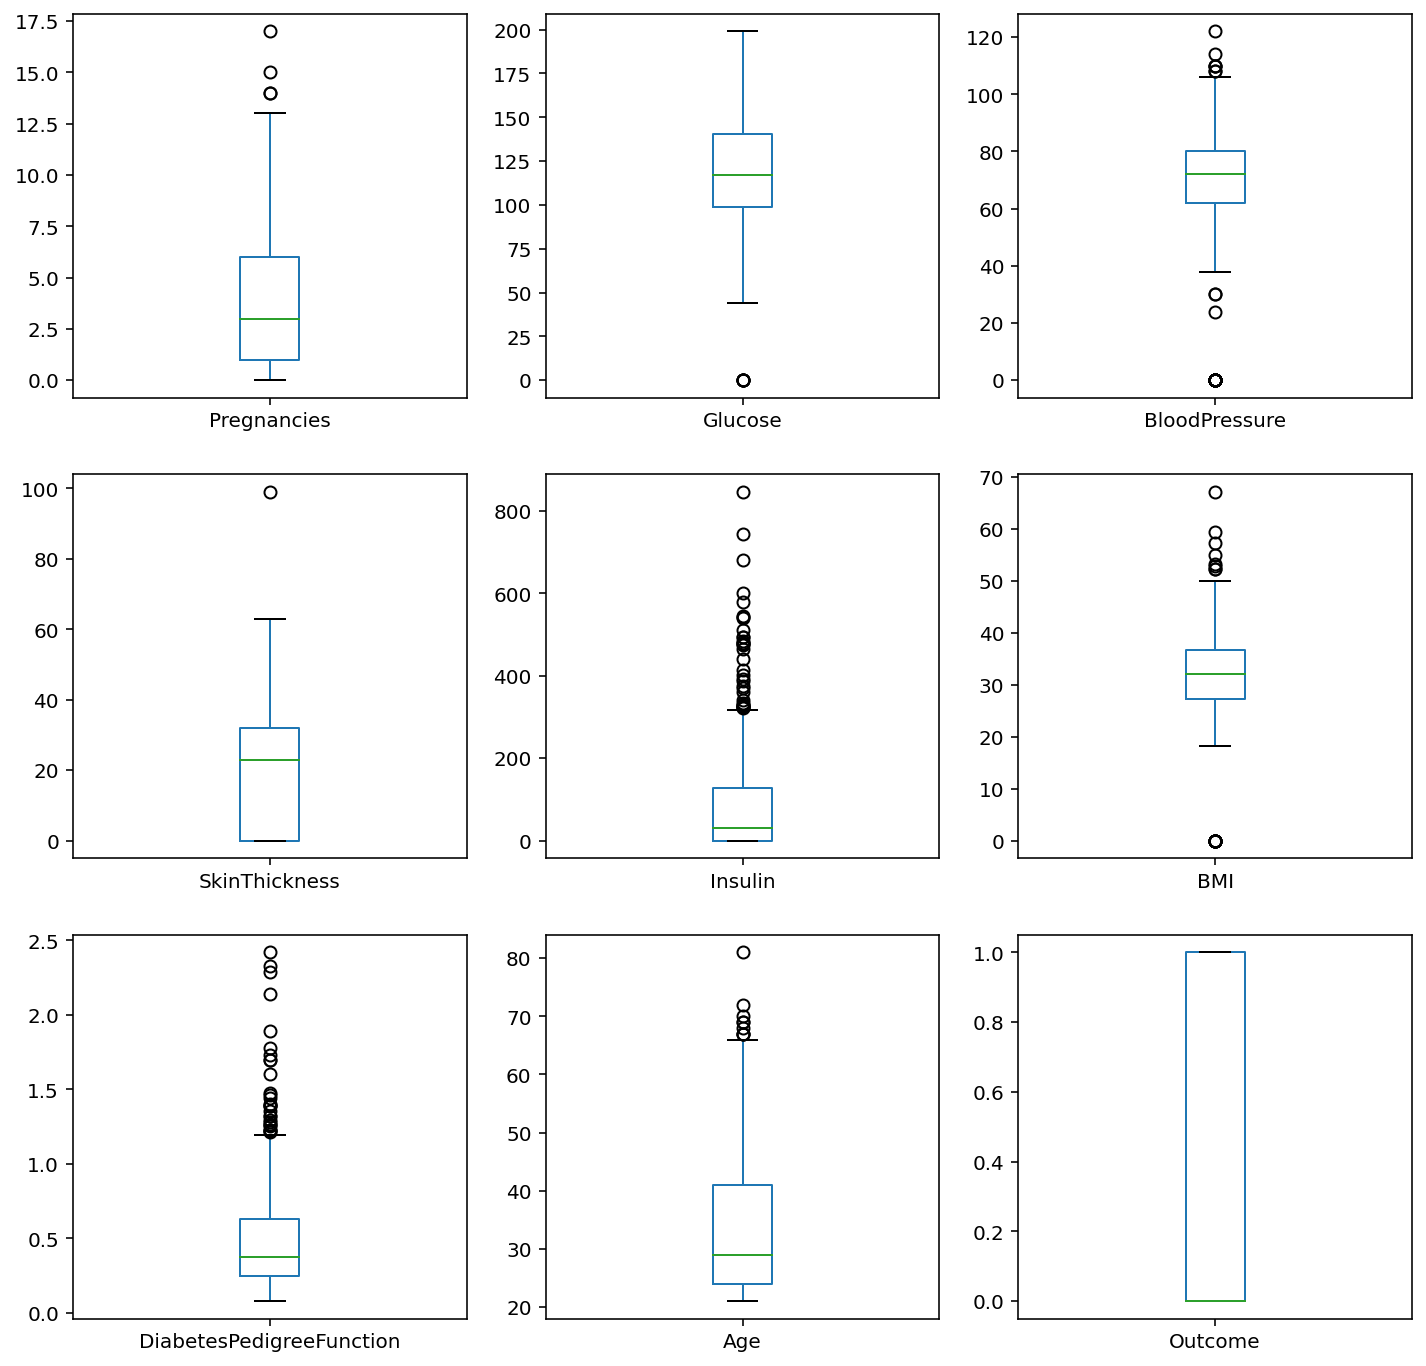

In [31]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12)) 

# Box plot helps to know the median value, Inter Quartile Range and Overall distribution of the data.

Observed that spread of attributes is quite different.

Attributes Age, Insulin appear to be quite skewed towards smaller values. 


Scaling on dataset can be applied during data pre-processing.

<AxesSubplot:>

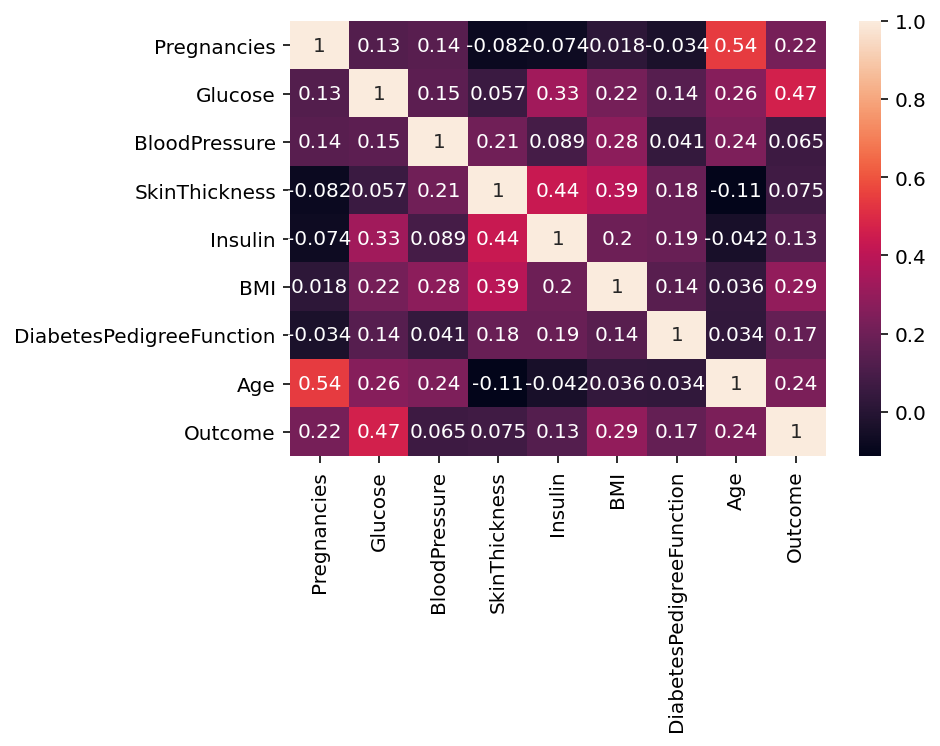

In [32]:
sns.heatmap(pima.corr(), annot=True)

# pima.corr() checks for the cross tab correlation between each paramter and 

# we are visualizing it on a heat map. Just seeing one half of the map will suffice.

Observed that attributes BloodPressure, SkinThickness are not much related to outcome. 

Feature extraction can be tried to observe performance.



# Data Pre-processing

Note : Replaced 0 values by mean, but no performance improvement was observed while evaluating models. 
Dropped rows with 0 values, performance seems to be improved. But dataset reduces to half. 
Hence commented below lines.

In [33]:
# Data preprocessing - replace zeroes with mean or drop records with 0 values.
# attributes_to_replace_zero =list(pima.columns[1:6])      # list all column names. 
# pima[attributes_to_replace_zero] = pima[attributes_to_replace_zero].replace(0, np.NaN)
# pima.fillna(dataset.mean(), inplace=True) 
# pima.dropna(inplace=True)


In [34]:
# Split into Input and Output.
attributes = list(pima.columns[:8])  # creates a list of all paramter names
X = pima[attributes].values  # masking the parameter values
y= pima['Outcome'].values  # Just picking up values from Outcome.

In [35]:
attributes

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [36]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [37]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [38]:
# Now scaling our input data

In [39]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 

X = sc_X.fit_transform(X)  # Transforming

In [40]:
X  # Data after scaling and transforming

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Note : Normalization reduced performance while evaluating models. Hence code disabled.

In [41]:
# from sklearn import preprocessing
# X = preprocessing.normalize(X)

Split into train and test sets.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [43]:
X_train

array([[ 0.93691372,  0.91091809,  0.45982725, ...,  0.40708356,
         0.66479969,  1.76634642],
       [ 0.04601433, -0.74783062, -0.47073225, ..., -0.48135115,
        -0.08720986, -0.95646168],
       [-1.14185152,  1.38037527,  1.08020025, ...,  2.57740266,
        -0.13553176, -0.87137393],
       ...,
       [ 0.04601433, -0.84172205, -0.2122435 , ..., -0.92556851,
        -0.97814487, -1.04154944],
       [ 2.12477957, -1.12339636,  0.25303625, ..., -0.24020459,
        -0.51908683,  0.14967911],
       [ 0.3429808 ,  0.47275805,  0.66661825, ..., -4.06047387,
         0.50775352,  3.04266271]])

In [44]:
X_test

array([[-0.84488505,  2.44447821,  0.35643175, ...,  1.38436175,
         2.784923  , -0.95646168],
       [-0.54791859, -0.43485916,  0.25303625, ...,  0.20401277,
        -0.20499449, -0.87137393],
       [ 0.04601433, -1.40507067, -0.36733675, ...,  0.25478047,
        -0.24425603, -0.70119842],
       ...,
       [ 0.04601433,  0.66054092,  0.87340925, ...,  1.52397292,
         0.52285411, -0.95646168],
       [-0.25095213, -0.15318486,  0.25303625, ..., -0.72249772,
        -1.10196973, -0.78628618],
       [-0.84488505, -0.43485916,  0.14964075, ..., -0.15136112,
         1.054395  , -0.78628618]])

In [45]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

Applied feature selection, but not much change in performance. So code lines disabled.

In [47]:
#Applying Kernel PCA (Principle Component Analysis) ( Not much change in performance) 
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 6) 

#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

#explained_variance = pca.explained_variance_ratio_

# It came out to be low

explained_variance  array([ 0.89142243,  0.059357  ,  0.02545099,  0.01317226,  0.00716861,
        0.00290131])

# Evaluating Models

In [48]:
# Importing the entire classifier suite of algorithms.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV


In [49]:
# Creating objects of required models.

# Within a list storing all the objects in a tuple form -> (nameofalgo, objectofalgo)
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))


In [51]:
# Finding accuracy of models.

results = []
for name,model in models:
    kfold = KFold(n_splits=10) #random_state=0
    
# KFold will provide train/test indices to split data in train and test sets. 
# It will split dataset into k (here 10) consecutive folds (without shuffling by default).
# Each fold is then used a validation set once while the k - 1 remaining folds form the training set  


    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
# It gives you an unbiased estimate of the actual performance you will get at runtime
    
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

SVM Linear           76.37 (+/-) 4.29 
Ridge                76.05 (+/-) 4.43 
LR                   75.89 (+/-) 4.99 
LinearSVC            75.89 (+/-) 5.09 
Calibrated           75.73 (+/-) 4.35 
LDA                  75.40 (+/-) 4.63 
SVM RBF              75.24 (+/-) 3.48 
Random Forest        74.93 (+/-) 5.01 
Bagging              74.59 (+/-) 4.92 
GNB                  73.78 (+/-) 4.50 
GradientBoosting     73.77 (+/-) 6.51 
KNN                  73.29 (+/-) 3.48 
QDA                  72.63 (+/-) 5.78 
AdaBoost             72.31 (+/-) 3.34 
DecisionTree         66.94 (+/-) 5.62 


# Optimize peformance of best model

SVM Linear seems performs best. Now let us try to find the optimistic parameters for SVM using GridSearchCV.

In Support Vector Machine (SVM), we need to choose different parameters to optimize our algorithms.

Choice of kernel (Similarity function)
Linear kernel
Polynomial kernel
Logisitic/ Sigmoid kernel
Gaussian/RBF kernel
Choice of parameter C
Choice of Gamma ( if using Gaussian kernel)
Parameter C

The C parameter controls the tradeoff between classification of training points accurately and a smooth decision boundary or in a simple word, it suggests the model to choose data points as a support vector.

The value of gamma and C should not be very high because it leads to the overfitting or it shouldn’t be very small (underfitting). Thus we need to choose the optimal value of C and Gamma in order to get a good fit.

In [53]:
from sklearn.model_selection import GridSearchCV
model = SVC()
paramaters = [
             {'C' : [0.01, 0.1, 1, 10, 100, 1000], 'kernel' : ['linear']}   
    

    # We take C values as prescribed by data analysts.
    # We choose linear to keep it according to our data model.
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

Best accuracy :  0.7605499735589636
Best parameters : {'C': 0.1, 'kernel': 'linear'}


# Finalize model

In [54]:
# Predicting output for test set. 

final_model = SVC(C = 0.1, kernel = 'linear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


[[98  9]
 [18 29]]
82.46753246753246
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



Conclusion :- Observed accuracy of 82.46% on test set using SVM linear model.